<a href="https://colab.research.google.com/github/Isha09a/RIO-125-HR-Salary-Dashboard---Train-the-Dataset-and-Predict-Salary/blob/main/salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/salary.csv')

In [ ]:
df.shape

(32561, 15)

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# some statistical values in numeric features
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.drop(columns = ['fnlwgt' , 'relationship'] , inplace = True)

In [ ]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [ ]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [ ]:
df['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [ ]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
df['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [ ]:
df['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

##Data Cleaning

In [ ]:
df.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [ ]:
df.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [ ]:
df.duplicated().sum()

4342

In [ ]:
df.drop_duplicates(keep = 'first' , inplace=True)

*   Change '?' in workclass , native-country , occupation with most repeating value
*   In country column most values are US so consider others as one








In [ ]:

# 1
df['workclass'] = df['workclass'].str.replace('?', 'Private' )
df['occupation'] = df['occupation'].str.replace('?', 'Prof-specialty' )
df['native-country'] = df['native-country'].str.replace('?', 'United-States' )

In [ ]:
# 2
for i in df['native-country'] :
    if i != ' United-States':
        df['native-country'].replace([i] , 'Others' , inplace = True)



In [ ]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Others,<=50K


#Exploratory Data Analysis

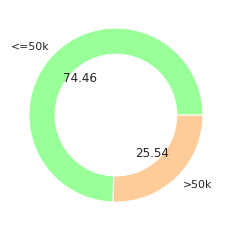

In [ ]:
c=['#99ff99','#ffcc99']
plt.pie(df['salary'].value_counts() , labels = ['<=50k' ,'>50k'] , autopct = '%0.2f',colors=c)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

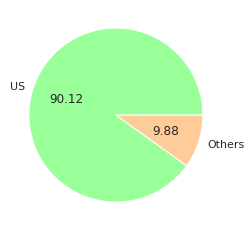

In [ ]:
c=['#99ff99','#ffcc99']
plt.pie(df['native-country'].value_counts(), labels = ['US' ,'Others'] , autopct = '%0.2f',colors=c)
plt.show()

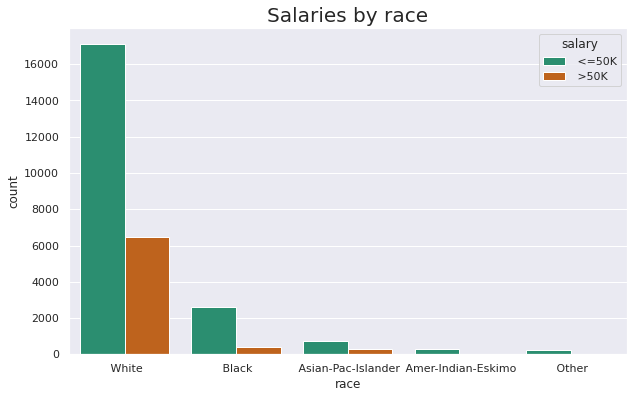

In [ ]:
#plotting salary by race

plt.figure(figsize = [10,6])
sns.countplot(data = df, x = 'race', hue = 'salary',palette = 'Dark2')
plt.title('Salaries by race', size = 20)
plt.show()

Text(0.5, 1.0, 'Sex VS Salary')

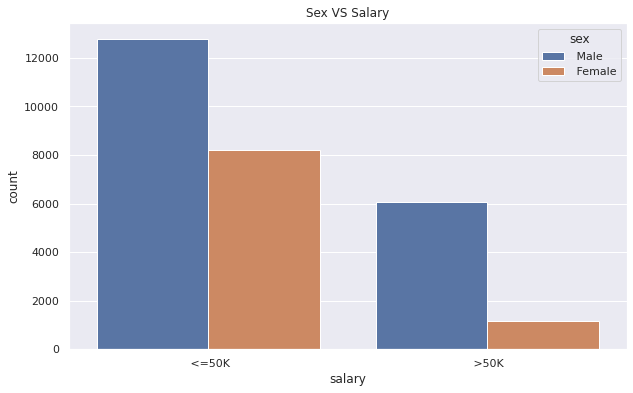

In [ ]:
# Sex VS Salary
fig = plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df,x='salary', hue='sex')
ax.set_title('Sex VS Salary')

Text(0.5, 1.0, 'Education VS Salary')

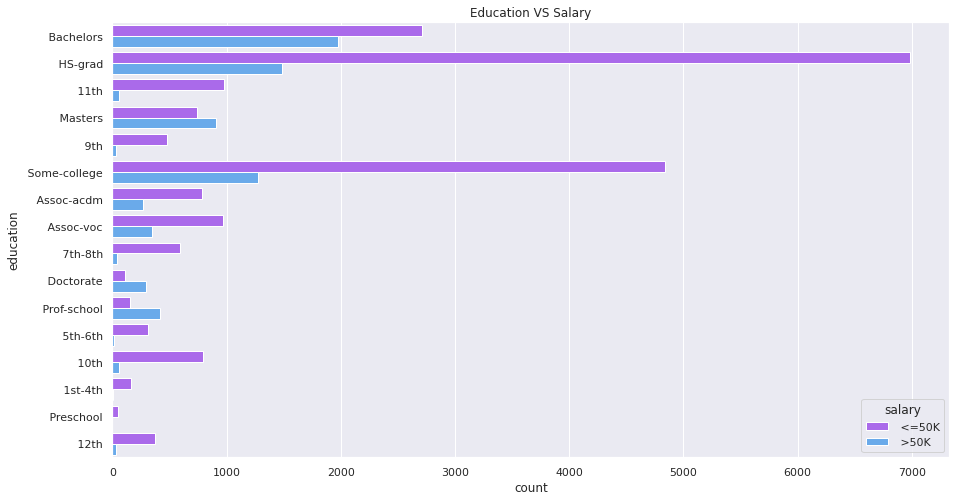

In [ ]:
# education level vs salary count plot
plt.figure(figsize=(15, 8))
ax = sns.countplot(data=df,y='education', hue='salary',palette='cool_r')
ax.set_title('Education VS Salary')

Text(0.5, 1.0, 'Workclass VS Salary')

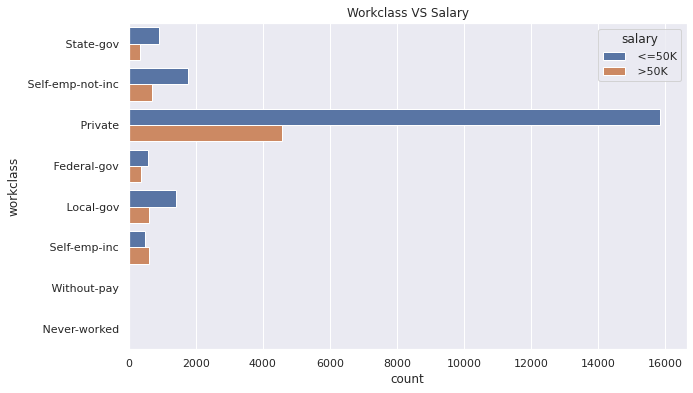

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df,y='workclass', hue='salary')
ax.set_title('Workclass VS Salary')

In [ ]:
from sklearn.preprocessing import LabelEncoder
df = df.apply(LabelEncoder().fit_transform)
df .head()

,age,workclass,education,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,22,6,9,12,4,0,4,1,25,0,39,0,0
1,33,5,9,12,2,3,4,1,0,0,12,0,0
2,21,3,11,8,0,5,4,1,0,0,39,0,0
3,36,3,1,6,2,5,2,1,0,0,39,0,0
4,11,3,9,12,2,9,2,0,0,0,39,1,0


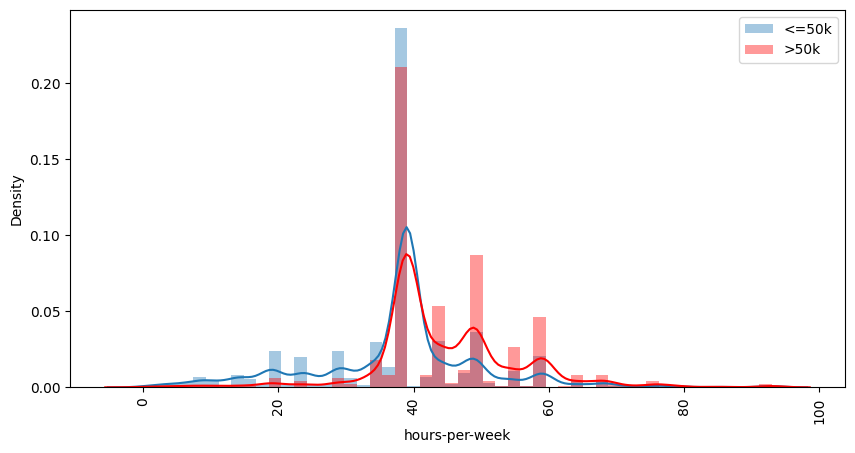

In [ ]:
plt.figure(figsize=(10,5),dpi=100)
sns.distplot(df[df['salary'] ==0]['hours-per-week'],label='<=50k')
sns.distplot(df[df['salary'] ==1]['hours-per-week'] , color='red',label='>50k')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

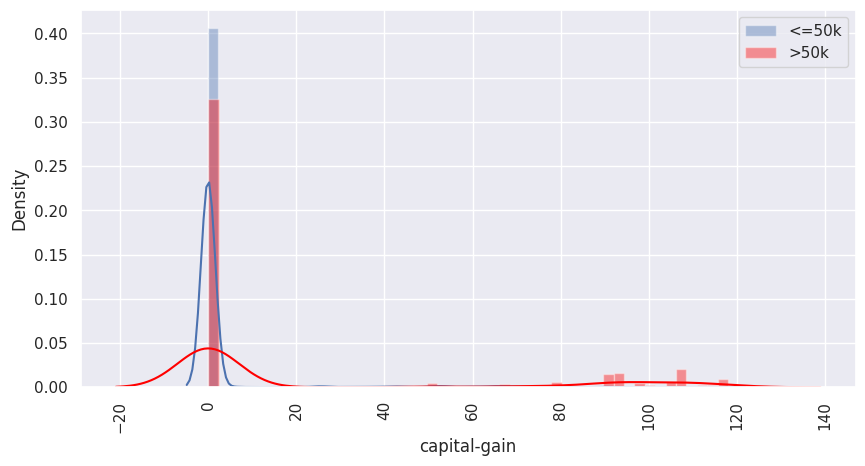

In [ ]:
plt.figure(figsize=(10,5),dpi=100)
sns.distplot(df[df['salary'] ==0]['capital-gain'],label='<=50k')
sns.distplot(df[df['salary'] ==1]['capital-gain'] , color='red',label='>50k')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

In [ ]:
#Mostly every person having salary les than 50K have less capital gain than person having salary greater than 50k & Here lies an outlier of capital gain greater 9500 so we will remove it
df = df[df['capital-gain'] <6000 ]

In [ ]:
high_salary = df[df['salary'] == 1]
low_salary = df[df['salary'] == 0]

<Figure size 600x400 with 0 Axes>

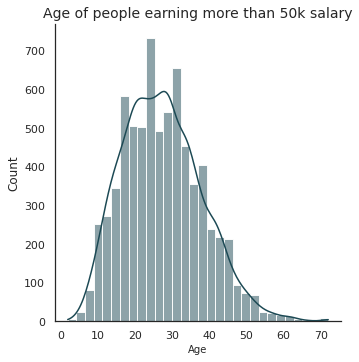

In [ ]:
# plotting distribution plot with kernel desity to check age of people earning more than 50k
sns.set()
sns.set_style('white')

plt.figure(dpi = 100)
sns.displot(high_salary['age'], color  = '#1c4954', bins = 30,kde = True)
plt.title('Age of people earning more than 50k salary', size = 14)
plt.xlabel('Age', size = 10)
plt.show()

<Figure size 600x400 with 0 Axes>

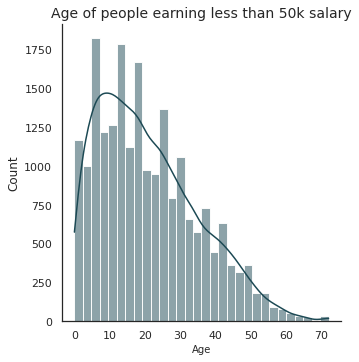

In [ ]:
# plotting distribution plot with kernel desity to check age of people earning less than 50k
sns.set()
sns.set_style('white')

plt.figure(dpi = 100)
sns.displot(low_salary['age'], color  = '#1c4954', bins = 30,kde = True)
plt.title('Age of people earning less than 50k salary', size = 14)
plt.xlabel('Age', size = 10)
plt.show()

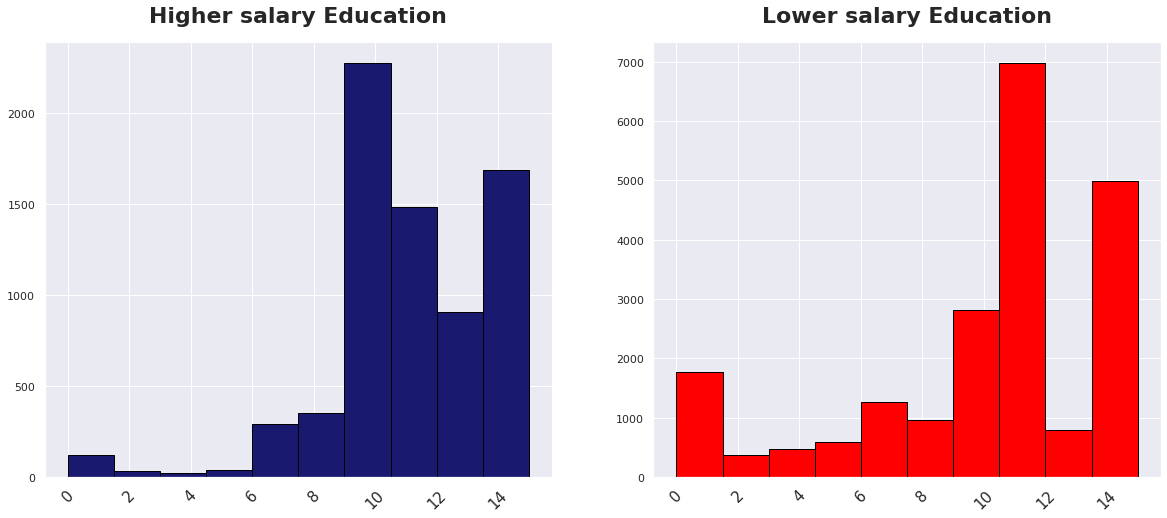

In [ ]:
##  comparing education of people who make high salary vs people who make lower salary and see if there is a difference.
sns.set()
plt.figure(figsize = [20,8])

plt.subplot(1,2,1)
plt.hist(high_salary['education'], color = 'midnightblue', edgecolor = 'black')
plt.xticks(rotation=45, size=15)
plt.title('Higher salary Education', fontsize=22, fontweight='bold', pad=20)

plt.subplot(1,2,2)
order = []
plt.hist(low_salary['education'], color = 'red', edgecolor = 'black')
plt.xticks(rotation=45, size=15)
plt.title('Lower salary Education', fontsize=22,fontweight='bold', pad=20)
plt.xlabel(None)
plt.show()

<Axes: >

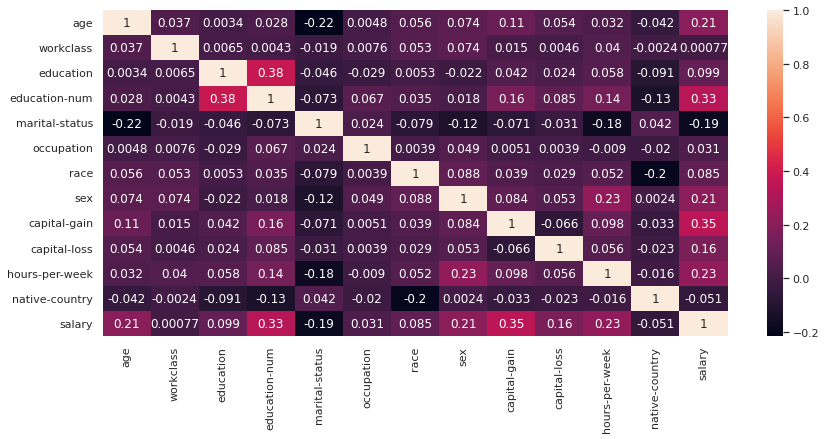

In [ ]:
#heatmap
plt.figure(figsize=(14,6))
sns.heatmap(df.corr() , annot=True)

##Feature Engineering and Model Training

In [ ]:
X=df.drop(columns='salary')
y=df['salary']

In [ ]:
X.head()

,age,workclass,education,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,22,6,9,12,4,0,4,1,25,0,39,0
1,33,5,9,12,2,3,4,1,0,0,12,0
2,21,3,11,8,0,5,4,1,0,0,39,0
3,36,3,1,6,2,5,2,1,0,0,39,0
4,11,3,9,12,2,9,2,0,0,0,39,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score

In [ ]:

X.dtypes

age               int64
workclass         int64
education         int64
education-num     int64
marital-status    int64
occupation        int64
race              int64
sex               int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country    int64
dtype: object

#Logistic Regression

In [ ]:
# fit the model
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression(random_state=0, max_iter=X.shape[0])
logR.fit(X_train, y_train)

LogisticRegression(max_iter=28219, random_state=0)

In [ ]:
# predict
y_pred = logR.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
lrconfusion = confusion_matrix(y_test,y_pred)
print("\n\nConfusion matrix: \n\n",lrconfusion)



Confusion matrix: 

 [[3932  254]
 [ 800  658]]


In [ ]:
# printing accuracy, f1 score, precison and recall values
lraccuracy = accuracy_score(y_test,y_pred)
lrf1_score = f1_score(y_test, y_pred)
lrprecision = precision_score(y_test, y_pred)
lrrecall = recall_score(y_test, y_pred)
results = np.array(['Accuracy','Precision','Recall','F1 Score'])
valuess = np.round(np.array([lraccuracy,lrprecision,lrrecall,lrf1_score]),3)
x = pd.DataFrame(np.column_stack((results,valuess)),columns = ['result', 'values'])
x



,result,values
0,Accuracy,0.813
1,Precision,0.721
2,Recall,0.451
3,F1 Score,0.555


#Random Forest

In [ ]:
# fit the model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [ ]:
# predict
y_pred = rf.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
#confusion matrix
rfconfusion = confusion_matrix(y_test,y_pred)
print("\nConfusion matrix: \n",rfconfusion)


Confusion matrix: 
 [[3842  344]
 [ 586  872]]


In [ ]:
# printing accuracy, f1 score, precison and recall values
rfaccuracy = accuracy_score(y_test,y_pred)
rfprecision = precision_score(y_test, y_pred)
rfrecall = recall_score(y_test, y_pred)
rff1_score = f1_score(y_test, y_pred)
rfsults = np.array(['Accuracy','Precision','Recall','F1 Score'])
valuess = np.round(np.array([rfaccuracy,rfprecision,rfrecall,rff1_score]),3)
x = pd.DataFrame(np.column_stack((results,valuess)),columns = ['result', 'values'])
x

,result,values
0,Accuracy,0.835
1,Precision,0.717
2,Recall,0.598
3,F1 Score,0.652


#KNeighborsClassifier


In [ ]:
# Let's first find the best value for K. In this case for 'n_neighbors' argument
from sklearn.neighbors import KNeighborsClassifier

scores = []
for i in range(1, 10, 2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    scores.append(score)
scores = pd.DataFrame(pd.Series(scores, index=[1,3,5,7,9], name='scores'))\
    .sort_values(by='scores', ascending=False)
scores

,scores
7,0.821935
9,0.821935
5,0.819986
3,0.809001
1,0.780829


In [ ]:
#From the above chart, k=9 has the highest value. Hence, that is the best choice for K
# fit the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
# predict
y_pred = knn.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
# confusion matrix
knnconfusion = confusion_matrix(y_test,y_pred)
print("\nConfusion matrix: \n",knnconfusion)


Confusion matrix: 
 [[3763  423]
 [ 582  876]]


In [ ]:
# printing accuracy, f1 score, precison and recall values
knnaccuracy = accuracy_score(y_test,y_pred)
knnf1_score = f1_score(y_test, y_pred)
knnprecision = precision_score(y_test, y_pred)
knnrecall = recall_score(y_test, y_pred)
results = np.array(['Accuracy','Precision','Recall','F1 Score'])
valuess = np.round(np.array([knnaccuracy,knnprecision,knnrecall,knnf1_score]),3)
x = pd.DataFrame(np.column_stack((results,valuess)),columns = ['result', 'values'])
x

,result,values
0,Accuracy,0.822
1,Precision,0.674
2,Recall,0.601
3,F1 Score,0.635


#svm

In [ ]:
# Support vector machine
from sklearn.svm import SVC
svm = SVC(kernel = 'linear')
svm.fit(X_train, y_train)
svm_model_y_hat = svm.predict(X_test)
svmconfusion = confusion_matrix(y_test,svm_model_y_hat)
svmaccuracy = accuracy_score(y_test,svm_model_y_hat)
svmf1_score = f1_score(y_test, svm_model_y_hat)
svmprecision = precision_score(y_test, svm_model_y_hat)
svmrecall = recall_score(y_test, svm_model_y_hat)

In [ ]:
results = np.array(['Accuracy','Precision','Recall','F1 Score'])
valuess = np.round(np.array([svmaccuracy,svmprecision,svmrecall,svmf1_score]),3)
x = pd.DataFrame(np.column_stack((results,valuess)),columns = ['result', 'values'])
x

,result,values
0,Accuracy,0.796
1,Precision,0.75
2,Recall,0.318
3,F1 Score,0.447


#Gaussian model

In [ ]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB
GNB=GaussianNB()
GNB.fit(X_train,y_train)


GaussianNB()

In [ ]:
# predict
y_pred = GNB.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
# confusion matrix
GNBconfusion = confusion_matrix(y_test,y_pred)
print("\n\nConfusion matrix: \n\n",GNBconfusion)



Confusion matrix: 

 [[3887  299]
 [ 803  655]]


In [ ]:
# printing accuracy, f1 score, precison and recall values
gnbaccuracy = accuracy_score(y_test,y_pred)
gnbf1_score = f1_score(y_test, y_pred)
gnbprecision = precision_score(y_test, y_pred)
gnbrecall = recall_score(y_test, y_pred)
results = np.array(['Accuracy','Precision','Recall','F1 Score'])
valuess = np.round(np.array([gnbaccuracy,gnbprecision,gnbrecall,gnbf1_score]),3)
x = pd.DataFrame(np.column_stack((results,valuess)),columns = ['result', 'values'])
x

,result,values
0,Accuracy,0.805
1,Precision,0.687
2,Recall,0.449
3,F1 Score,0.543


In [ ]:
#compairing the results of all above models.

accuracy = np.round(np.array([lraccuracy, knnaccuracy, svmaccuracy, rfaccuracy,gnbaccuracy]),3)
precision =np.round(np.array([lrprecision, knnprecision, svmprecision,rfprecision ,gnbprecision]),3)
recall =np.round( np.array([lrrecall, knnrecall, svmrecall,rfrecall,gnbrecall]),3)
f_1 = np.round(np.array([lrf1_score, knnf1_score, svmf1_score, rff1_score,gnbf1_score]),3)
models = np.array(['Logistic Regression', 'KNN', 'SVM','Random Forests','Gaussion model'])
results = pd.DataFrame(np.column_stack((models, accuracy, precision, recall, f_1)),
                       columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.813,0.721,0.451,0.555
1,KNN,0.822,0.674,0.601,0.635
2,SVM,0.796,0.75,0.318,0.447
3,Random Forests,0.835,0.717,0.598,0.652
4,Gaussion model,0.805,0.687,0.449,0.543
